In [10]:
using DifferentialEquations, PyPlot

In [5]:
function leafremoval!(du,u,p,t)
    z = (p-1)/sum(u.*eachindex(u))
    du[1] = z*(2u[2]-u[1]) - 1
    for k=2:lastindex(u)-1
        du[k] = z*((k+1)*u[k+1]-k*u[k])
    end
    du[end] = -z*lastindex(u)*u[end]
end

leafremoval! (generic function with 1 method)

In [14]:
ε = 0
p = 3
u0 = [ε,0.8,0.2-ε]
α=sum(u0 .* eachindex(u0))/p
tspan = (0.0,α)
prob = ODEProblem(leafremoval!,u0,tspan,p)
sol = solve(prob,abstol=1e-8,reltol=1e-8);

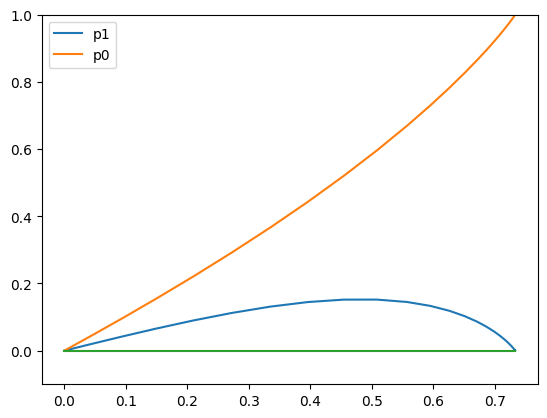

PyObject <matplotlib.legend.Legend object at 0x7f3e1e69aca0>

In [15]:
ylim(-0.1,1)
plot(sol.t, first.(sol.u), label="p1")
plot(sol.t, 1 .-sum.(sol.u), label="p0")
plot(sol.t, zero(sol.t))
legend()